In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
def load_pickle(p):
    with open(p,"rb") as f:
        df=pickle.load(f)
    return df

In [3]:
start_distance=27000
end_distance=42000
L=end_distance-start_distance

In [ ]:
# load the observation data
track=load_pickle("../data/04_feature/sec27/track/10m/track_dataset.pkl")

dates=track["date"].unique()
track

In [ ]:
# load the data that linear regression forecasted
linear_df=load_pickle("../data/07_model_output/Linear/regression/3/sec27.pkl"

linear_df=linear_df[["left_surface_LR_pred"]]
linear_df=linear_df.reset_index()
linear_df=linear_df.sort_values(["date","distance"])
linear_df=linear_df.rename(columns={"left_surface_LR_pred":"score"}).copy()
linear_df

In [ ]:
# load the data that ConvLSTM forecasted
run_id=10001

target,pred,_,calc_dates=load_pickle("../data/07_model_output/conv_lstm/regression/{}.pkl".format(run_id))
conv_lstm_df=pd.DataFrame(index=range((len(calc_dates))*(L)),columns=["date","distance","score"])
conv_lstm_df["date"]=np.repeat(calc_dates,L)
conv_lstm_df["date"]=pd.to_datetime(conv_lstm_df["date"])
conv_lstm_df["distance"]=np.repeat(np.arange(start_distance,end_distance).reshape(1,-1),len(calc_dates),axis=0).flatten()
conv_lstm_df["score"]=pred[:,0,:,].flatten()
conv_lstm_df

In [ ]:
# load the data that LSTM forecasted
run_id=10001

target,pred,_,calc_dates=load_pickle("../data/07_model_output/LSTM/regression/{}.pkl".format(run_id))

lstm_df=pd.DataFrame(index=range((len(calc_dates))*(L)),columns=["date","distance","score"])
lstm_df["date"]=np.repeat(calc_dates,L)
lstm_df["date"]=pd.to_datetime(lstm_df["date"])
lstm_df["distance"]=np.repeat(np.arange(start_distance,end_distance).reshape(1,-1),len(calc_dates),axis=0).flatten()
lstm_df["score"]=pred[:,0,:,].flatten()
lstm_df

In [ ]:
# load the data that GRU forecasted
run_id=10001

target,pred,_,calc_dates=load_pickle("../data/07_model_output/GRU/regression/{}.pkl".format(run_id))

gru_df=pd.DataFrame(index=range((len(calc_dates))*(L)),columns=["date","distance","score"])
gru_df["date"]=np.repeat(calc_dates,L)
gru_df["date"]=pd.to_datetime(gru_df["date"])
gru_df["distance"]=np.repeat(np.arange(start_distance,end_distance).reshape(1,-1),len(calc_dates),axis=0).flatten()
gru_df["score"]=pred[:,0,:,].flatten()
gru_df

In [ ]:
# load the maintenance data
work_df=load_pickle("../data/04_feature/sec27/10m/work_unrolled.pkl")
work_df["work"]=work_df[["fix_uneven","tamping","marutai","exchange_ballast","exchange_rail_r","exchange_rail_l","disposal_mud","sleeper","others"]].sum(axis=1)
work_df

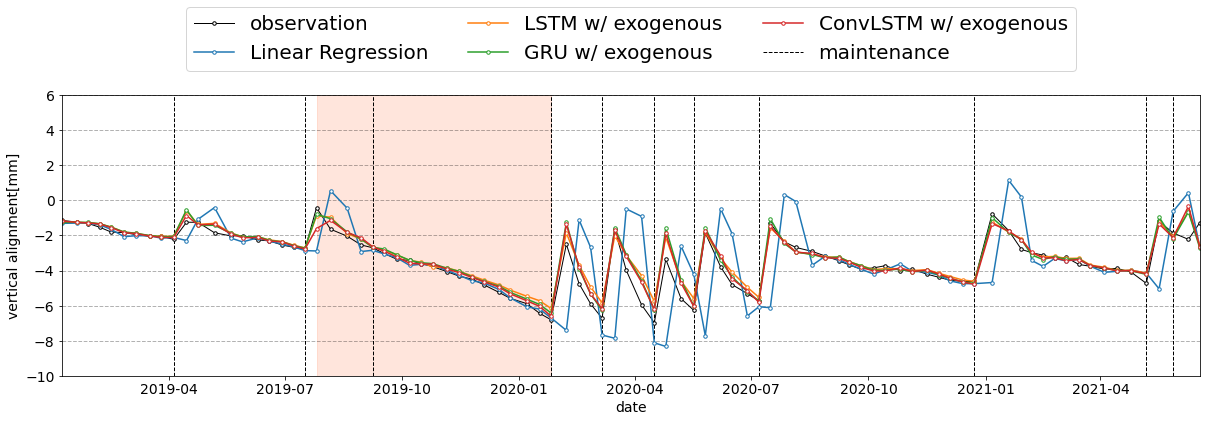

In [11]:
# visualize figure 3a
loc= #<--- the position of point with a normal maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14
y_min=-10
y_max=6

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(17,6))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=linear_df.loc[(linear_df["distance"]==loc)&(linear_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="Linear Regression",**line_args)

buf=lstm_df.loc[(lstm_df["distance"]==loc)&(lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="LSTM w/ exogenous",**line_args)

buf=gru_df.loc[(gru_df["distance"]==loc)&(gru_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="GRU w/ exogenous",**line_args)

buf=conv_lstm_df.loc[(conv_lstm_df["distance"]==loc)&(conv_lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="ConvLSTM w/ exogenous",**line_args)

ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(y_min,y_max)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.axvspan(pd.to_datetime("2019-07-26"),pd.to_datetime("2020-01-26"), color = "coral",alpha=0.2)
ax.legend(ncol=3,bbox_to_anchor=(0,0,1,1.35),loc="upper center",fontsize=20)
ax.tick_params(labelsize=fontsize)
ax.set_yticks(np.arange(y_min,y_max+0.1,2))
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.plot()


fig.subplots_adjust(left=0.05, right=0.98, bottom=0.13, top=0.78) 
fig.savefig("./compare_wave1.pdf")

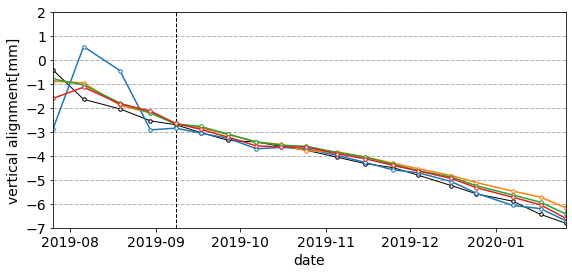

In [12]:
# visualize figure 3c
loc=#<--- the position of point with a normal maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14
y_min=-7
y_max=2

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(8,4))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=linear_df.loc[(linear_df["distance"]==loc)&(linear_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="Linear Regression",**line_args)

buf=lstm_df.loc[(lstm_df["distance"]==loc)&(lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="LSTM w/ exogenous",**line_args)

buf=gru_df.loc[(gru_df["distance"]==loc)&(gru_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="GRU w/ exogenous",**line_args)

buf=conv_lstm_df.loc[(conv_lstm_df["distance"]==loc)&(conv_lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="ConvLSTM w/ exogenous",**line_args)

ax.set_xlim(pd.to_datetime("2019-07-26"),pd.to_datetime("2020-01-26"))
ax.set_ylim(y_min,y_max)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.tick_params(labelsize=fontsize)
ax.set_yticks(np.arange(y_min,y_max+0.1,1))
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.plot()


fig.subplots_adjust(left=0.09, right=0.98, bottom=0.15, top=0.9) 
fig.savefig("./compare_wave2.pdf")

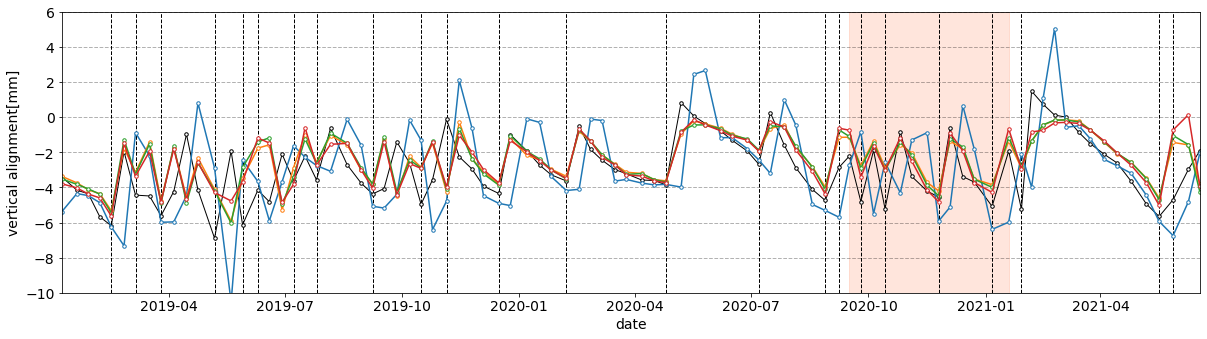

In [13]:
# visualize figure 3b
loc=#<--- the position of point with a high maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14
y_min=-10
y_max=6

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(17,6))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=linear_df.loc[(linear_df["distance"]==loc)&(linear_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="Linear Regression",**line_args)

buf=lstm_df.loc[(lstm_df["distance"]==loc)&(lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="LSTM w/ exogenous",**line_args)

buf=gru_df.loc[(gru_df["distance"]==loc)&(gru_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="GRU w/ exogenous",**line_args)

buf=conv_lstm_df.loc[(conv_lstm_df["distance"]==loc)&(conv_lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="ConvLSTM w/ exogenous",**line_args)

ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(y_min,y_max)
# ax.grid(which = "major", axis = "x", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.axvspan(pd.to_datetime("2020-09-16"),pd.to_datetime("2021-01-19"), color = "coral",alpha=0.2)
# ax.legend(fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_yticks(np.arange(y_min,y_max+0.01,2))
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.plot()

fig.subplots_adjust(left=0.05, right=0.98, bottom=0.13, top=0.78) 
fig.savefig("./compare_wave3.pdf")

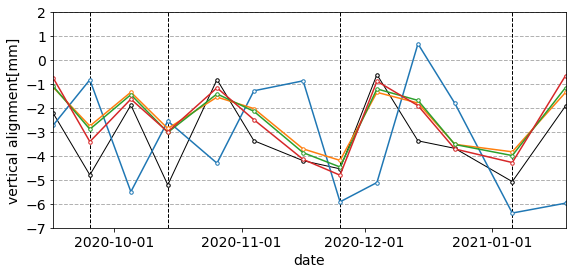

In [14]:
# visualize figure 3d
loc=#<--- the position of point with a high maintenance frequency --->
test_date="2018/11/07"
input_len=5
line_args={
    "marker":".",
    "markerfacecolor":"white",
    "fillstyle":"full",
    "markersize":7,
}
fontsize=14
y_min=-7
y_max=2

dates=track.loc[track["date"]>test_date,"date"].unique()
dates=dates[input_len:]

fig,ax = plt.subplots(figsize=(8,4))

tmp=work_df.loc[work_df["distance"]==loc,["date","work"]]
tmp=tmp.loc[tmp["work"]>0,"date"].to_numpy()
ax.vlines(tmp,ymin=y_min,ymax=y_max,label="maintenance",color="black",linestyles="dashed",linewidth=1)

buf=track.loc[(track["distance"]==loc)&(track["date"].isin(dates))]
ax.plot(buf["date"],buf["left_surface"],label="observation",linewidth=1,color="black",**line_args)

buf=linear_df.loc[(linear_df["distance"]==loc)&(linear_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="Linear Regression",**line_args)

buf=lstm_df.loc[(lstm_df["distance"]==loc)&(lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="LSTM w/ exogenous",**line_args)

buf=gru_df.loc[(gru_df["distance"]==loc)&(gru_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="GRU w/ exogenous",**line_args)

buf=conv_lstm_df.loc[(conv_lstm_df["distance"]==loc)&(conv_lstm_df["date"].isin(dates))]
ax.plot(buf["date"],buf["score"],label="ConvLSTM w/ exogenous",**line_args)

ax.set_xlim(pd.to_datetime("2020-09-16"),pd.to_datetime("2021-01-19"))
ax.set_ylim(y_min,y_max)
ax.grid(which = "major", axis = "y", color = "black", alpha = 0.3, linestyle = "--", linewidth = 1)
ax.tick_params(labelsize=fontsize)
ax.set_yticks(np.arange(y_min,y_max+0.01,1))
ax.set_xlabel("date",fontsize=fontsize)
ax.set_ylabel("vertical alignment[mm]",fontsize=fontsize)
ax.set_xticks([pd.to_datetime("2020-10"),pd.to_datetime("2020-11"),pd.to_datetime("2020-12"),pd.to_datetime("2021-01")])
ax.plot()


fig.subplots_adjust(left=0.09, right=0.98, bottom=0.15, top=0.9) 
fig.savefig("./compare_wave4.pdf")